# Statistical and Predictive Analysis of Traffic Accident Severity  
## Project Overview:  
This project focuses on road accidents, which are a serious worldwide issue that 
result in fatalities, serious injuries, and financial losses. Improved road safety 
tactics can be created by having a better understanding of the variables that 
affect accident severity. In order to find trends, test theories, and eventually 
create a predictive regression model to predict accident severity, statistical 
analysis of a traffic accident dataset is the aim. To evaluate data distribution, 
normality, and correlations between variables, the study will employ both 
descriptive and inferential statistical techniques. In addition to global datasets, 
the project will also place special emphasis on analyzing traffic accident data 
from Bangladesh to address local road safety challenges. 

## Tool and Technologies:  
• Jupyter Notebook – Interactive development environment for coding and 
visualization. 

• Python Libraries: 

• NumPy – Numerical computations. 

• Pandas – Data cleaning, manipulation, and grouping. 

• Matplotlib & Seaborn – Data visualization and plotting. 

• SciPy – Statistical tests (Shapiro test, KS test, parametric & non
parametric tests). 

• Scikit-learn – Building and evaluating predictive models.

## Importing necessary packages and modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import shapiro, kstest, norm, mannwhitneyu, kruskal, spearmanr, chi2_contingency
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

## Dataset
This dataset is designed to support predictive modelling of traffic accidents by capturing key factors such as weather conditions, road conditions, driver behaviour and other environmental variables.

In [2]:
df = pd.read_csv('road_accident_dataset2.csv')
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
dtypes: float64(6), object(7)
memory usage: 85.4+ KB


## Preprocessing and Cleaning

In [4]:
#Numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Numeric columns:", numeric_cols)


Numeric columns: Index(['Traffic_Density', 'Speed_Limit', 'Number_of_Vehicles',
       'Driver_Alcohol', 'Driver_Age', 'Driver_Experience'],
      dtype='object')


In [5]:
#Categorical Columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['Weather', 'Road_Type', 'Time_of_Day', 'Accident_Severity',
       'Road_Condition', 'Vehicle_Type', 'Road_Light_Condition'],
      dtype='object')


In [6]:
# Check missing values
print("🔍 Checking for missing values in each numerical column:\n")
print(df[numeric_cols].isnull().sum())
print("🔍 Checking for missing values in each categorical column:\n")
print(df[categorical_cols].isnull().sum())
# Check number of unique values
print("📊 Checking number of unique values in each column (helps detect categorical features):\n")
print(df.nunique())
print("\n💡 Columns with few unique values are likely categorical,")
print("while those with many unique values are numerical.\n")

🔍 Checking for missing values in each numerical column:

Traffic_Density       42
Speed_Limit           42
Number_of_Vehicles    42
Driver_Alcohol        42
Driver_Age            42
Driver_Experience     42
dtype: int64
🔍 Checking for missing values in each categorical column:

Weather                 42
Road_Type               42
Time_of_Day             42
Accident_Severity       42
Road_Condition          42
Vehicle_Type            42
Road_Light_Condition    42
dtype: int64
📊 Checking number of unique values in each column (helps detect categorical features):

Weather                  5
Road_Type                4
Time_of_Day              4
Traffic_Density          3
Speed_Limit             24
Number_of_Vehicles      10
Driver_Alcohol           2
Accident_Severity        3
Road_Condition           4
Vehicle_Type             4
Driver_Age              52
Driver_Experience       60
Road_Light_Condition     3
dtype: int64

💡 Columns with few unique values are likely categorical,
while tho

In [7]:
# Step 1: Fill missing categorical values with "Unknown"
for col in categorical_cols:
    df[col].fillna("Unknown", inplace=True)

# Step 2: Drop rows with missing numerical values
df = df.dropna(subset=numeric_cols)

# Step 3: Verify
print(df.isnull().sum())


Weather                 0
Road_Type               0
Time_of_Day             0
Traffic_Density         0
Speed_Limit             0
Number_of_Vehicles      0
Driver_Alcohol          0
Accident_Severity       0
Road_Condition          0
Vehicle_Type            0
Driver_Age              0
Driver_Experience       0
Road_Light_Condition    0
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 608 entries, 0 to 839
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               608 non-null    object 
 1   Road_Type             608 non-null    object 
 2   Time_of_Day           608 non-null    object 
 3   Traffic_Density       608 non-null    float64
 4   Speed_Limit           608 non-null    float64
 5   Number_of_Vehicles    608 non-null    float64
 6   Driver_Alcohol        608 non-null    float64
 7   Accident_Severity     608 non-null    object 
 8   Road_Condition        608 non-null    object 
 9   Vehicle_Type          608 non-null    object 
 10  Driver_Age            608 non-null    float64
 11  Driver_Experience     608 non-null    float64
 12  Road_Light_Condition  608 non-null    object 
dtypes: float64(6), object(7)
memory usage: 66.5+ KB


## Exploratory Data Analysis (EDA)

In [9]:
# -----------------------------
# 1️⃣ Descriptive Statistics
# -----------------------------

# Mean: average value of each numeric column
print("Mean of numeric columns:\n", df[numeric_cols].mean(), "\n")

# Median: middle value when data is sorted
print("Median of numeric columns:\n", df[numeric_cols].median(), "\n")

# Mode: most frequent value
print("Mode of numeric columns:\n", df[numeric_cols].mode().iloc[0], "\n")
# Note: mode() can return multiple values, we take the first one

# Standard Deviation: measures spread of the data
print("Standard Deviation of numeric columns:\n", df[numeric_cols].std(), "\n")

# -----------------------------
# 2️⃣ Shape of Distribution
# -----------------------------

# Skewness: measures asymmetry of the data distribution
# Positive skew → tail on right; Negative skew → tail on left
print("Skewness of numeric columns:\n", df[numeric_cols].skew(), "\n")

# Kurtosis: measures "peakedness" of the distribution
# High kurtosis → sharper peak; Low kurtosis → flatter distribution
print("Kurtosis of numeric columns:\n", df[numeric_cols].kurtosis(), "\n")

Mean of numeric columns:
 Traffic_Density        1.001645
Speed_Limit           70.172697
Number_of_Vehicles     3.294408
Driver_Alcohol         0.148026
Driver_Age            43.353618
Driver_Experience     38.743421
dtype: float64 

Median of numeric columns:
 Traffic_Density        1.0
Speed_Limit           60.0
Number_of_Vehicles     3.0
Driver_Alcohol         0.0
Driver_Age            43.0
Driver_Experience     39.0
dtype: float64 

Mode of numeric columns:
 Traffic_Density        1.0
Speed_Limit           60.0
Number_of_Vehicles     3.0
Driver_Alcohol         0.0
Driver_Age            27.0
Driver_Experience     27.0
Name: 0, dtype: float64 

Standard Deviation of numeric columns:
 Traffic_Density        0.785996
Speed_Limit           32.338991
Number_of_Vehicles     2.075312
Driver_Alcohol         0.355418
Driver_Age            15.130023
Driver_Experience     15.312773
dtype: float64 

Skewness of numeric columns:
 Traffic_Density      -0.002894
Speed_Limit           1.965407
Num

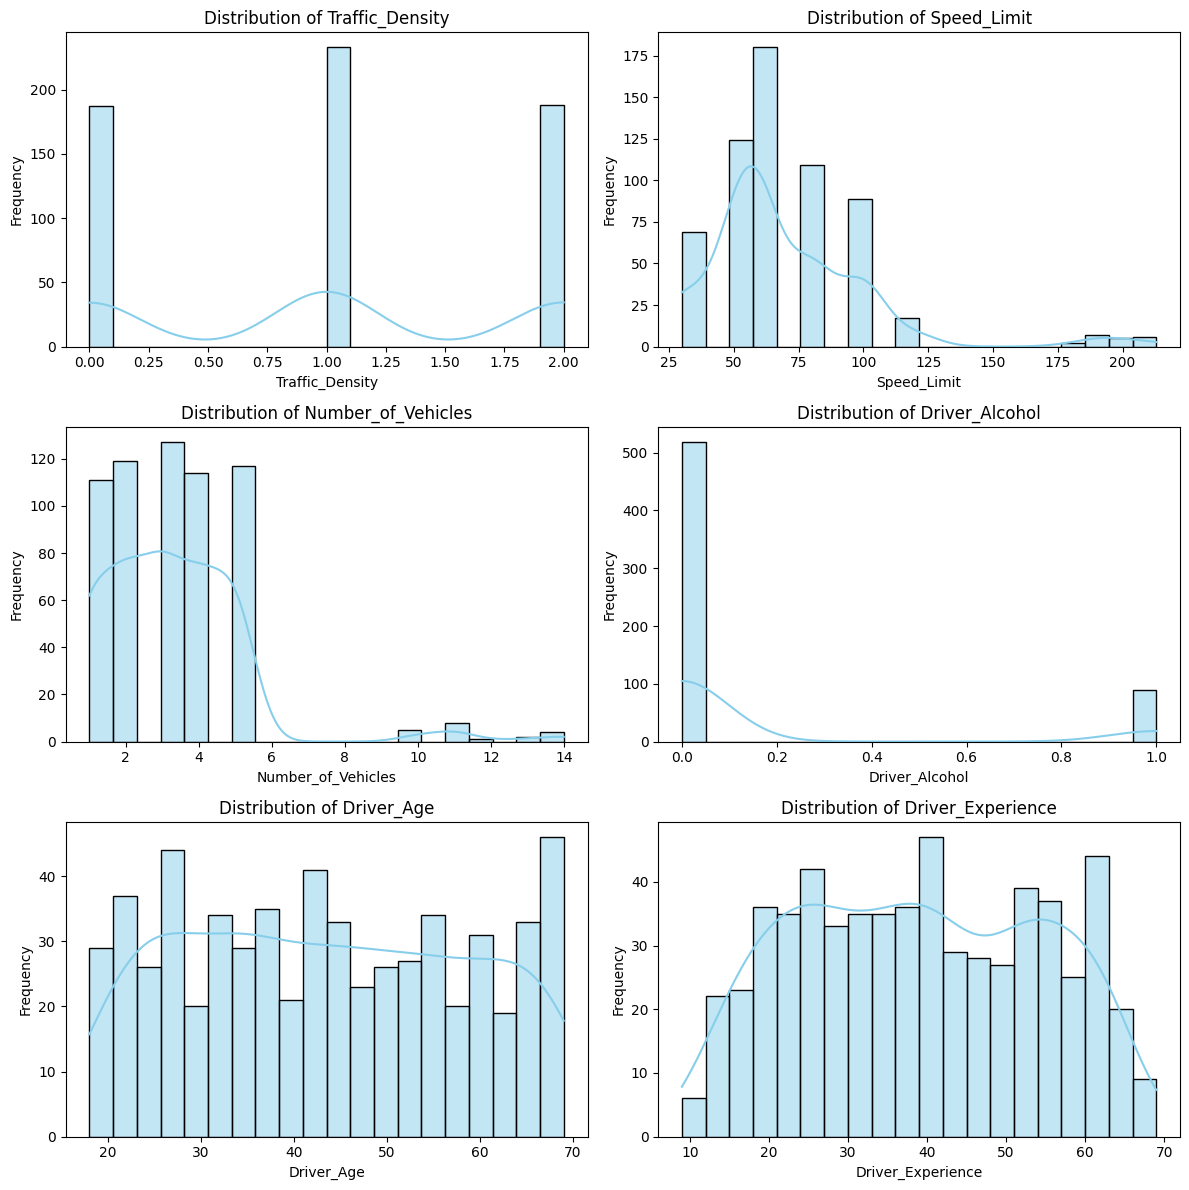

In [10]:
# Number of columns in the grid
n_cols = 2
n_rows = math.ceil(len(numeric_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))
axes = axes.flatten()  # flatten for easy iteration

# Loop through numeric columns
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=20, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

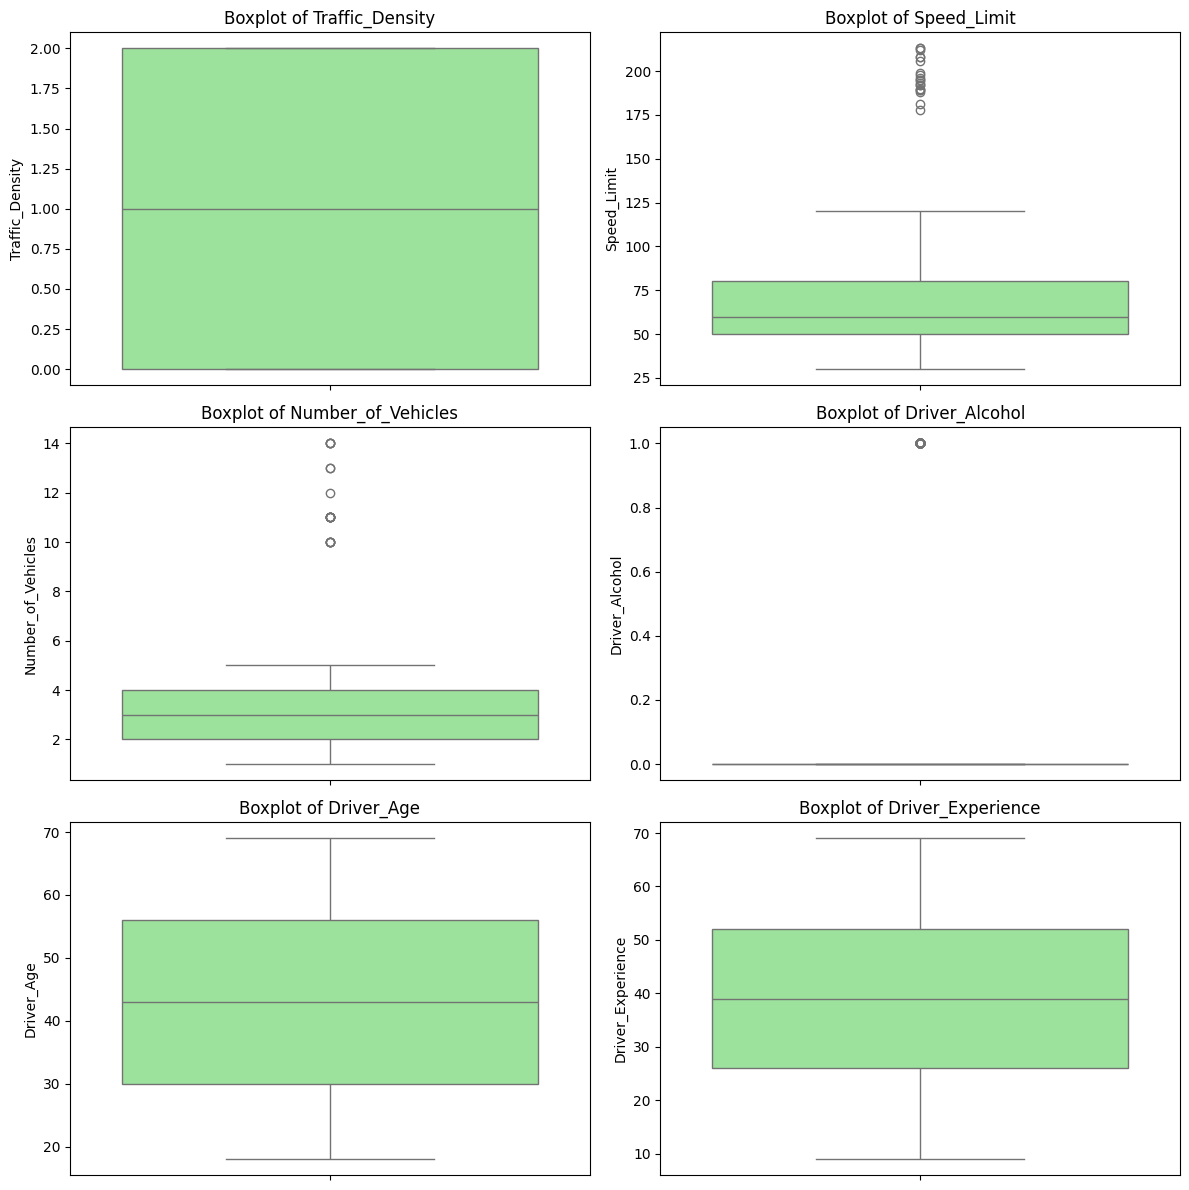

In [11]:
# Number of columns in the grid
n_cols = 2
n_rows = math.ceil(len(numeric_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))
axes = axes.flatten()  # flatten for easy iteration

# Loop through numeric columns
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], color='lightgreen', ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


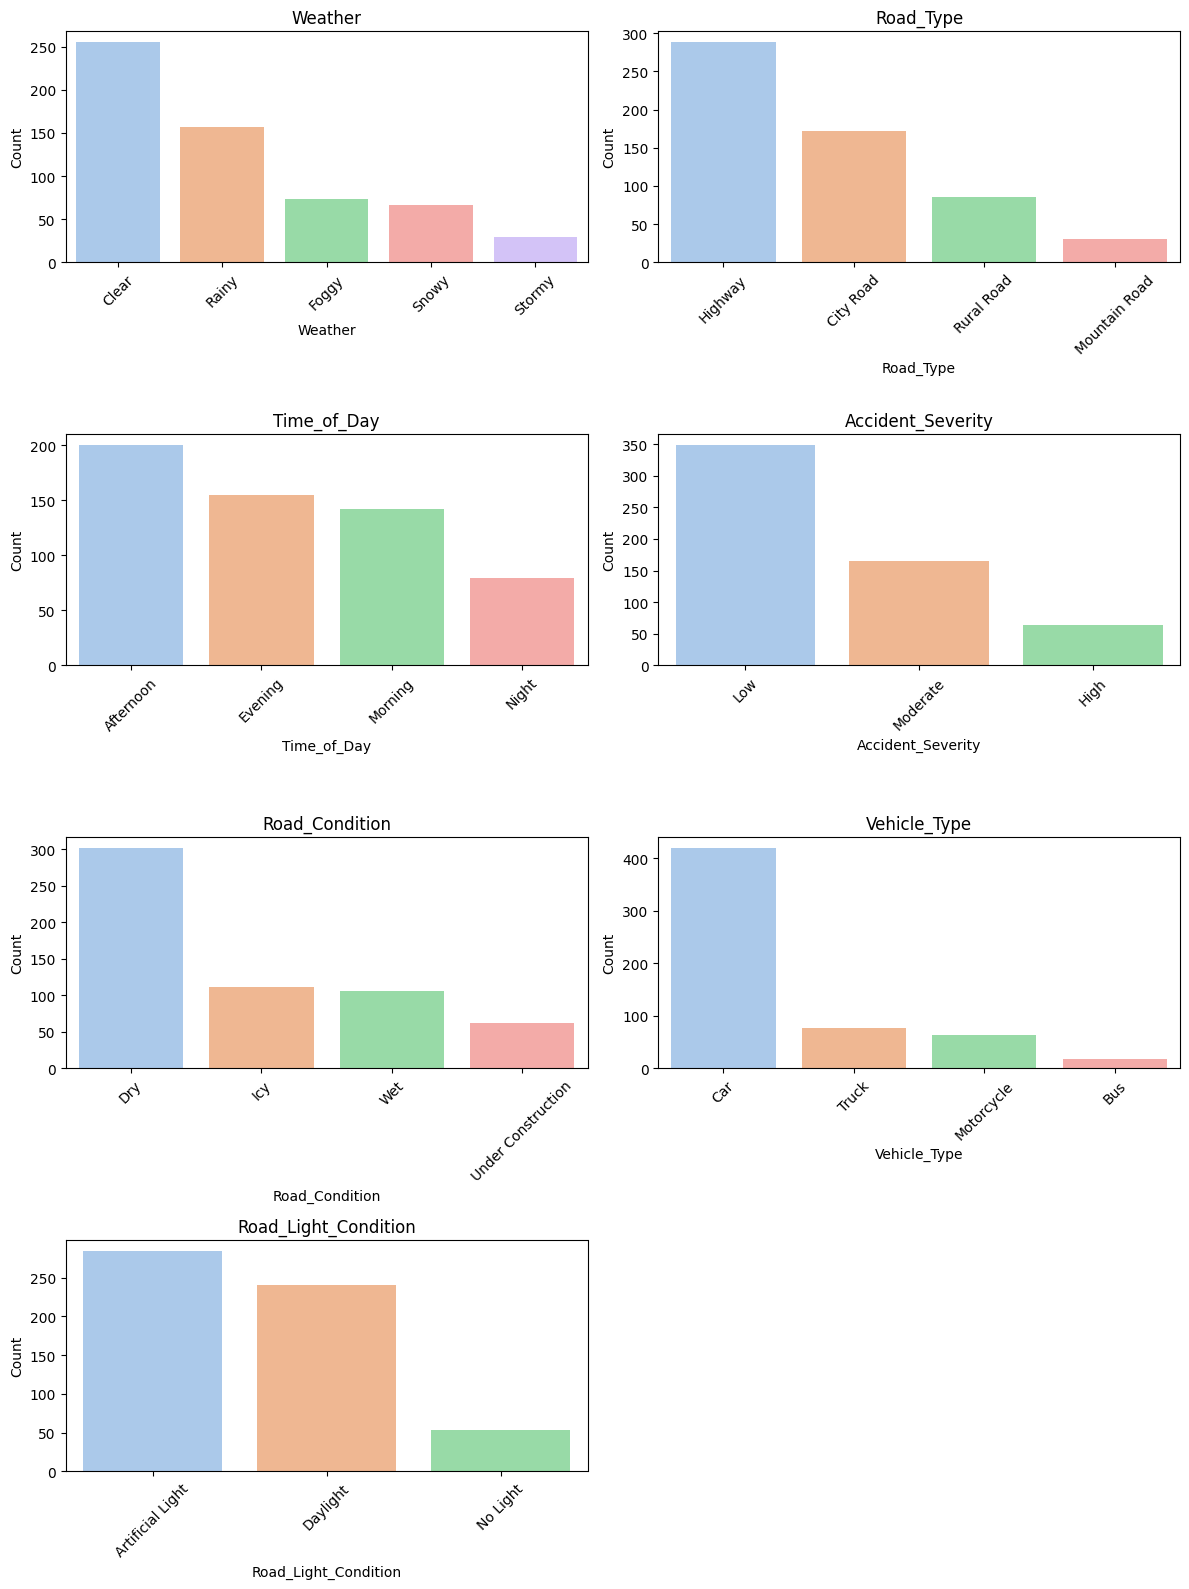

In [12]:

# Filter categorical columns that actually have meaningful categories
filtered_categorical_cols = [col for col in categorical_cols if df[col].nunique() > 1]

# Define grid size
n_cols = 2  # number of plots per row
n_rows = math.ceil(len(filtered_categorical_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))
axes = axes.flatten()  # flatten in case of single row

# Loop through categorical columns
for i, col in enumerate(filtered_categorical_cols):
    # Filter out "Unknown"
    filtered_data = df[df[col] != "Unknown"]
    
    sns.countplot(x=col, data=filtered_data,
                  order=filtered_data[col].value_counts().index,
                  palette='pastel', ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


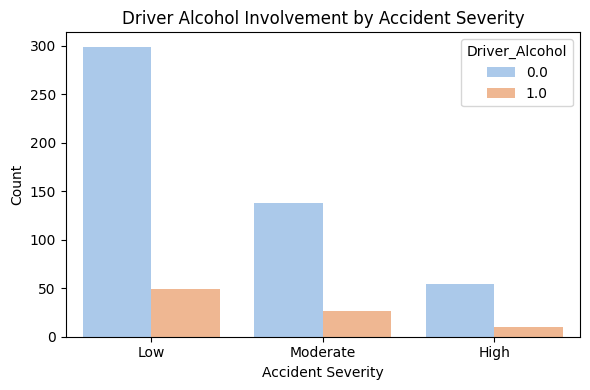

In [35]:
# Optional: visualize Driver_Alcohol separately as a countplot
plt.figure(figsize=(6, 4))
sns.countplot(x='Accident_Severity', hue='Driver_Alcohol', data=df_viz, palette='pastel')
plt.title("Driver Alcohol Involvement by Accident Severity")
plt.xlabel("Accident Severity")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


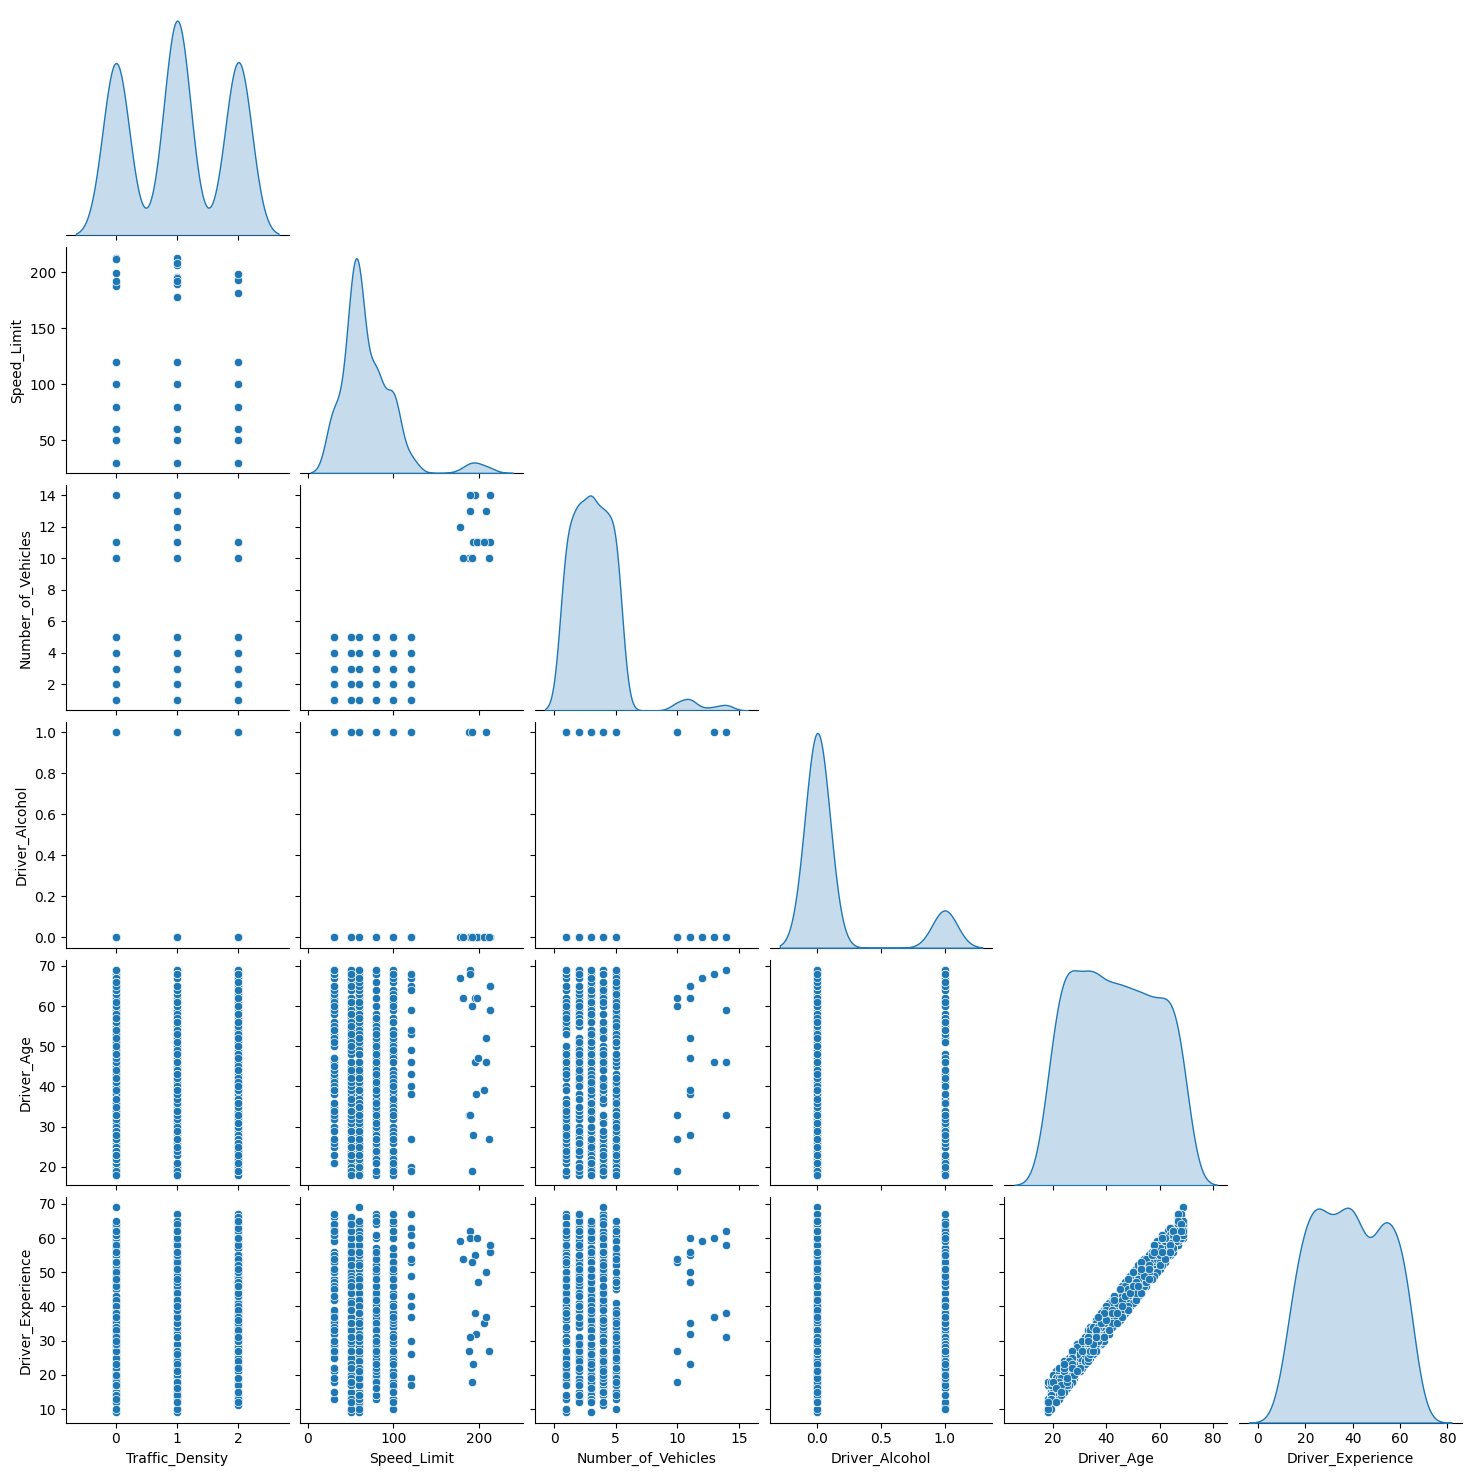

In [13]:
sns.pairplot(df[numeric_cols], diag_kind='kde', corner=True)
plt.savefig("pairplot.png", dpi=300, bbox_inches='tight')
plt.show()

The pairplot shows that most variables have concentrated, discrete distributions. Driver age and experience have a positive relationship, often increasing together. Alcohol involvement is binary, and speed limits as well as number of vehicles cluster at specific values. No strong linear correlations are evident among the other features.

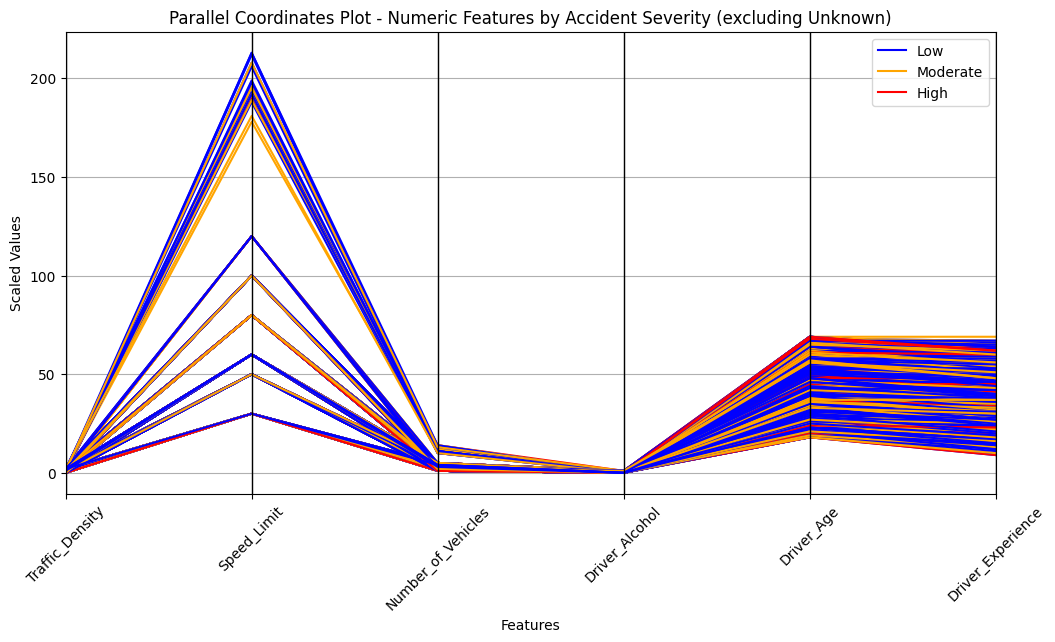

In [14]:
# Target column
target = 'Accident_Severity'

# Filter out rows where target is 'Unknown'
df_filtered = df[df[target] != "Unknown"].copy()

# Ensure target is string for coloring
df_filtered[target] = df_filtered[target].astype(str)

# Numeric features to plot
features = numeric_cols.tolist()  # exclude target if numeric

# Define custom color palette (Low=blue, Medium=orange, High=red)
colors = ['blue', 'orange', 'red']

# Plot parallel coordinates
plt.figure(figsize=(12,6))
parallel_coordinates(df_filtered[[target] + features],
                     class_column=target,
                     color=colors)
plt.title("Parallel Coordinates Plot - Numeric Features by Accident Severity (excluding Unknown)")
plt.xlabel("Features")
plt.ylabel("Scaled Values")
plt.xticks(rotation=45)
plt.savefig("parallel_coordinates_plot.png", dpi=300, bbox_inches='tight')
plt.show()

The parallel coordinates plot shows that high accident severity (red) is associated with lower speed limits, fewer vehicles, and younger, less experienced drivers. Low severity cases (blue) generally have higher speed limits, older and more experienced drivers, but otherwise similar profiles across features.

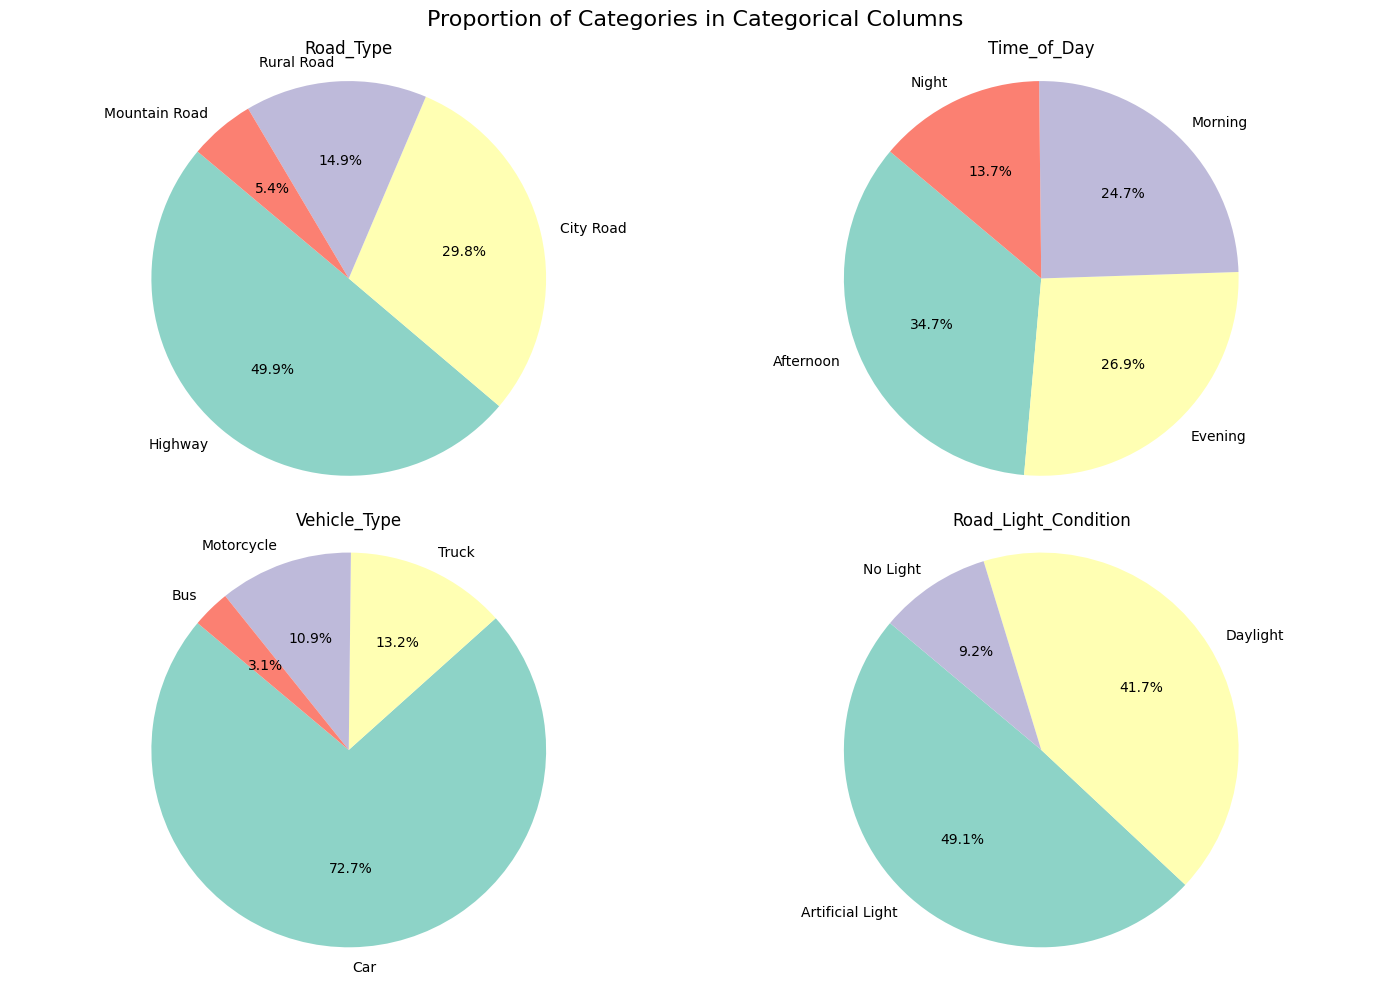

In [15]:
# Columns to plot
pie_columns = ['Road_Type', 'Time_of_Day', 'Vehicle_Type', 'Road_Light_Condition']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes = axes.flatten() 
for i, col in enumerate(pie_columns):
    # Filter out "Unknown"
    filtered_data = df[df[col] != "Unknown"]
    
    # Get counts
    counts = filtered_data[col].value_counts()
    
    # Plot pie chart
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
    axes[i].set_title(f'{col}')
    axes[i].axis('equal')  # Keep the pie circular

plt.suptitle("Proportion of Categories in Categorical Columns", fontsize=16)
plt.tight_layout()
plt.savefig("PieChart.png", dpi=300, bbox_inches='tight')
plt.show()

The categorical data reveals that most incidents occur on highways, in the afternoon, with cars as the primary vehicle type, and under artificial light conditions. Highways (49.9%), afternoons (34.7%), cars (72.7%), and artificial light (49.1%) dominate their respective categories, suggesting these are the most common situations observed in the dataset.

## Statistical Analysis

### Purpose:
### To examine whether key numeric features differ significantly across accident severity levels.
### Since most features are not normally distributed (checked via Shapiro & KS), 
### we use non-parametric tests: Kruskal–Wallis (overall) and Mann–Whitney U (pairwise).


In [27]:
# ---------------------------
#  Shapiro and KS Test 
# ---------------------------
features = ["Speed_Limit", "Number_of_Vehicles", "Driver_Age", "Driver_Alcohol"]
severity_levels = ["Low", "Moderate", "High"]

print("=== 🧪 Normality Tests (Shapiro & Kolmogorov-Smirnov) ===\n")
for col in features:
    stat_shapiro, p_shapiro = shapiro(df[col].dropna())
    stat_ks, p_ks = kstest(df[col].dropna(), 'norm', args=(df[col].mean(), df[col].std()))
    print(f"{col}: Shapiro p={p_shapiro:.4f}, KS p={p_ks:.4f}", 
          "→ Not Normal" if p_shapiro < 0.05 or p_ks < 0.05 else "→ Normal")

print("\nConclusion: Most features are NOT normally distributed → Using non-parametric tests.\n")

=== 🧪 Normality Tests (Shapiro & Kolmogorov-Smirnov) ===

Speed_Limit: Shapiro p=0.0000, KS p=0.0000 → Not Normal
Number_of_Vehicles: Shapiro p=0.0000, KS p=0.0000 → Not Normal
Driver_Age: Shapiro p=0.0000, KS p=0.0029 → Not Normal
Driver_Alcohol: Shapiro p=0.0000, KS p=0.0000 → Not Normal

Conclusion: Most features are NOT normally distributed → Using non-parametric tests.



In [28]:
# ---------------------------
#  Kruskal–Wallis Test
# ---------------------------
print("=== 🧮 Kruskal–Wallis Test (Overall Difference Across Severity Levels) ===\n")

for feature in features:
    groups = [df[df['Accident_Severity'] == sev][feature].dropna() for sev in severity_levels]
    stat, p = kruskal(*groups)
    eta_sq = stat / (len(df) - 1)  # Effect size
    if p < 0.05:
        result = " Significant difference"
    else:
        result = " No significant difference"
    print(f"{feature}: H={stat:.2f}, p={p:.4f}, η²={eta_sq:.3f} → {result}")

print("\nInterpretation:")
print("Features with p < 0.05 differ significantly across accident severity levels.")
print("η² indicates effect strength: 0.01=small, 0.06=medium, 0.14=large.\n")

=== 🧮 Kruskal–Wallis Test (Overall Difference Across Severity Levels) ===

Speed_Limit: H=1.58, p=0.4528, η²=0.003 →  No significant difference
Number_of_Vehicles: H=1.05, p=0.5906, η²=0.002 →  No significant difference
Driver_Age: H=3.42, p=0.1808, η²=0.006 →  No significant difference
Driver_Alcohol: H=0.49, p=0.7832, η²=0.001 →  No significant difference

Interpretation:
Features with p < 0.05 differ significantly across accident severity levels.
η² indicates effect strength: 0.01=small, 0.06=medium, 0.14=large.



In [30]:
# ---------------------------
#  Mann–Whitney U Test (Pairwise)
# ---------------------------
print("=== 🔍 Mann–Whitney U Tests (Pairwise Comparisons Between Severity Levels) ===\n")

for feature in features:
    print(f"\nFeature: {feature}")
    group_low = df[df['Accident_Severity'] == 'Low'][feature].dropna()
    group_moderate = df[df['Accident_Severity'] == 'Moderate'][feature].dropna()
    group_high = df[df['Accident_Severity'] == 'High'][feature].dropna()
    
    pairs = [("Low", "Moderate", group_low, group_moderate),
             ("Moderate", "High", group_moderate, group_high),
             ("Low", "High", group_low, group_high)]
    
    for a, b, g1, g2 in pairs:
        stat, p = mannwhitneyu(g1, g2, alternative='two-sided')
        print(f"  {a} vs {b} → U={stat:.2f}, p={p:.4f}",
              "✅ Significant" if p < 0.05 else " Not significant")

print("\nSummary: Mann–Whitney U reveals if any specific severity pair differs significantly.\n")

=== 🔍 Mann–Whitney U Tests (Pairwise Comparisons Between Severity Levels) ===


Feature: Speed_Limit
  Low vs Moderate → U=26936.00, p=0.2474  Not significant
  Moderate vs High → U=5697.50, p=0.3433  Not significant
  Low vs High → U=11322.00, p=0.8281  Not significant

Feature: Number_of_Vehicles
  Low vs Moderate → U=27160.00, p=0.3143  Not significant
  Moderate vs High → U=5550.50, p=0.5407  Not significant
  Low vs High → U=11082.00, p=0.9504  Not significant

Feature: Driver_Age
  Low vs Moderate → U=27768.00, p=0.5482  Not significant
  Moderate vs High → U=6095.50, p=0.0700  Not significant
  Low vs High → U=12522.00, p=0.1134  Not significant

Feature: Driver_Alcohol
  Low vs Moderate → U=28054.50, p=0.4973  Not significant
  Moderate vs High → U=5319.00, p=0.8932  Not significant
  Low vs High → U=10964.00, p=0.7468  Not significant

Summary: Mann–Whitney U reveals if any specific severity pair differs significantly.



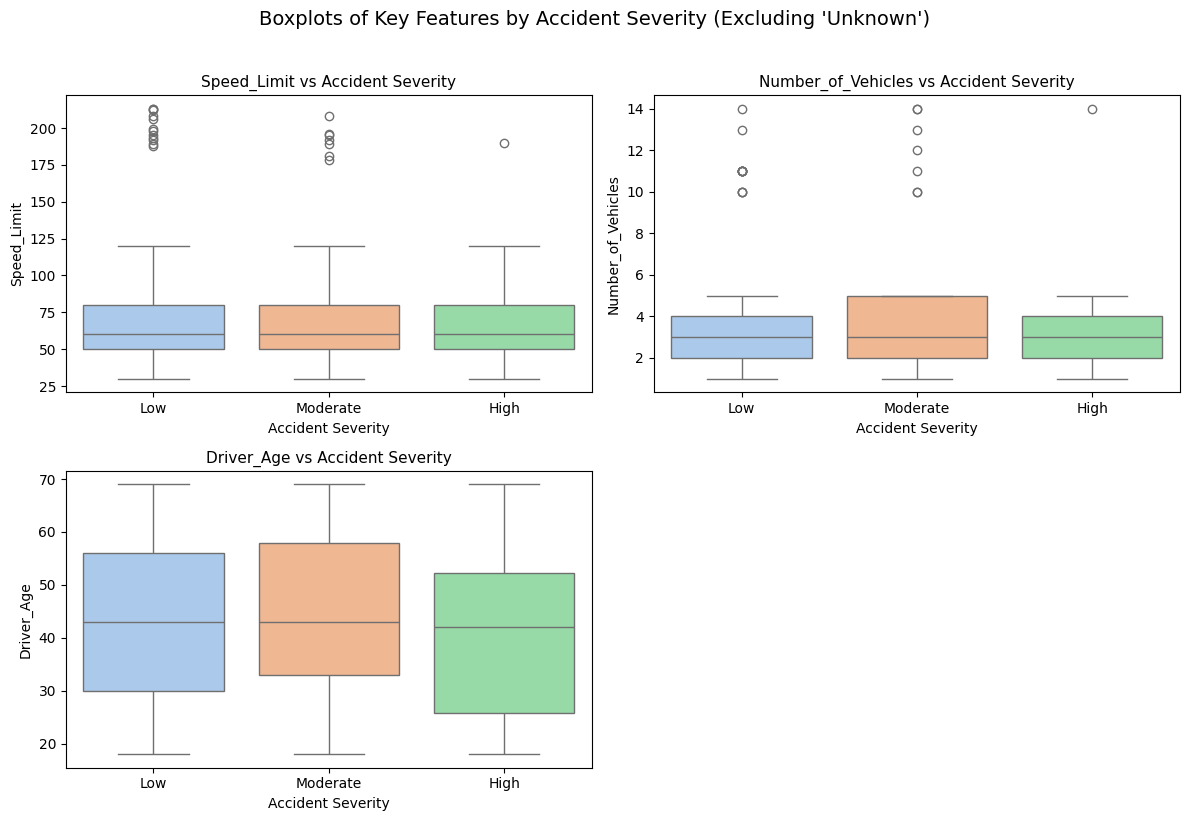


Interpretation:
- Boxplots visualize group differences found by the tests.
- Overlapping boxes = weak or no difference.
- Clear separation = strong statistical difference.



In [33]:
# ---------------------------
# 📈 Visualization (Improved)
# ---------------------------

features = ["Speed_Limit", "Number_of_Vehicles", "Driver_Age"]

# Remove 'Unknown' accident severity rows
df_viz = df[df['Accident_Severity'] != 'Unknown'].copy()

# Define grid size
n_cols = 2
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(
        x='Accident_Severity',
        y=feature,
        data=df_viz,
        palette='pastel',
        ax=axes[i]
    )
    axes[i].set_title(f"{feature} vs Accident Severity", fontsize=11)
    axes[i].set_xlabel("Accident Severity")
    axes[i].set_ylabel(feature)

# Hide any unused axes (in case feature count < 4)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Boxplots of Key Features by Accident Severity (Excluding 'Unknown')", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("- Boxplots visualize group differences found by the tests.")
print("- Overlapping boxes = weak or no difference.")
print("- Clear separation = strong statistical difference.\n")


## Predictive Modeling 